# Discrete Joint Semantic Alignment Hashing for Cross-Modal Image-Text Search（用于跨模态图文检索的离散的联合语义对齐散列）——论文翻译&阅读笔记


### 概要
有监督的跨模态图文散列在**理解数据搜索任务的视觉和语言之间的对应关系**方面引起了广泛关注。现有的方法通过利用给定的图像-文本数据对或要探索的监督信息，但这些方法仍然遇到了一些显然的缺陷：

  1. 多个语义信息（Semantic）之间没有接合，导致欠佳的搜索性能
  2. 这些方法大多采用了丢弃离散约束的方式，实现连续松弛的策略，这导致了大量（or大?）二进制验证的错误

解决上面的问题，作者提出了一种更新的有监督的散列方法，即**离散联合语义对齐散列（DJSAH）** 通俗讲是在语义间建立一个连接（又称类标签或成对相似性），因此有很高判别性的语义可被保存为散列代码的形式。

此外，一个离散的优化算法（with linear computation and memory cost//）被设计出来，以减少计算过程中哈希码的信息丢失，并且不会在过程中进行松弛策略。 在三个标准数据集上进行的试验和分析验证了DJSAH算法同其他前沿哈希方法相比的优越性

## 介绍
### 1.1 总体介绍
跨模态图文检索在跨越视觉和语言理解的媒体鸿沟起到重要作用，跨模态图文检索注重度量图像实例和文本实例之间的相关性。
由于最近互联网上的漫游多媒体数据爆炸式增长，基于散列的跨模态图文搜索方法，**将原始的高维特征矩阵**转换为紧凑的**二进制代码**，在多媒体信息处理和计算机视觉社区上一直是一个主流的研究课题。由于二进制码高效低内存消耗的优点，许多相关课题组已经取得了较好的进展。

因为图像文本间的媒体鸿沟，图文跨模态散列面临的的重要的问题是**如何在将原始数据实例二进制化为散列的同时保存跨模态语义的一致性**
当前的哈希方法主要分为两种：
  1. 第一种是无监督的，以从原始图像和文本数据模态中发现相关性；
  2. 第二种是有监督的学习，旨在通过获取共享的监督信息来挖掘对应关系（又称类标签或成对相似矩阵）
    
大体上，有监督的散列可以得到更加令人满意的结果（相比无监督的散列），所以有监督的散列是本文的主要关注方法。

### 1.2 有监督散列
许多有监督的哈希方法已经被研究出来，来提升跨模态图文检索的表现。这些有监督的方法主要是通过**构造高语义相似度或者公共标签信息来对搜索任务的统一哈希码进行学习**来进行设计。例如：有些代表性的著作  
Supervised Matrix Factorization Hashing (SMFH) **有监督的矩阵分解散列**  
Semantic Correlation Maximization (SCM) **语义相关最大化**  
Label Consistent Matrix Factorization Hashing (LCMFH)**标签一致的矩阵分解散列**   
Subspace Relation Learning for Cross-modal Hashing (SRLCH)**跨模态散列的子空间关联学习** etc.  
  
  
受益于深度学习技术的复兴，深度学习的相关研究被应用于跨模态图文检索，如有**监督的深度散列**，这些方法因为训练时间长，且不能解决散列模型的复杂目标函数，所以很难用于大规模跨模态图像文本数据检索的应用。

虽然现在有监督的哈希方法有不错的进展，仍然存在一些值得思考的问题：  
1. **有限的语义关系**：先前的大部分方法没有充分利用语义关系的情况下产生的检索结果不尽如人意，如LCMFH和SRLCH就**仅仅使用了类标签数据来生成哈希码**，而没有考虑模态内部成对的相似性；而SMFH，SCM和SePH通过**成对相似矩阵进行哈希编码的学习**，忽视了共性的标签信息且耗费了更多计算资源和存储空间。上述两种策略都没办法提供用于学习的这互补的语义信息，导致了 大量语义信息的丢失，从而无法得到更理想的检索表现。  
2. **二维优化问题**：在哈希优化方面，许多方法（如上述提到的五种）都采用了连续松弛法 **（通过丢弃离散约束来产生一个大概的哈希码的结果）** 但这不可避免的带来了大量的二进制验证错误以及随之而来的不够具有判断性的、不够理想的哈希码  
解决上述的两个问题，DJSAH的方法被提出（即**离散的联合语义对其散列**）。具体的讲，它结合了**共享类标签之间的语义一致性和转换后的成对相似性，并且也考虑了原始的图像文本数据的分布**，从而得到有区分度的统一哈希编码。因此，DJSAH充分利用到了多重语义关系，而不是进行有限的监督来提高检索的性能。

同时，作者提出来一个全新的优化算法，代替了传统迭代方法。新提出的优化算法，且新算法会直接生成离散的哈希码，因此减少了大二进制验证错误 

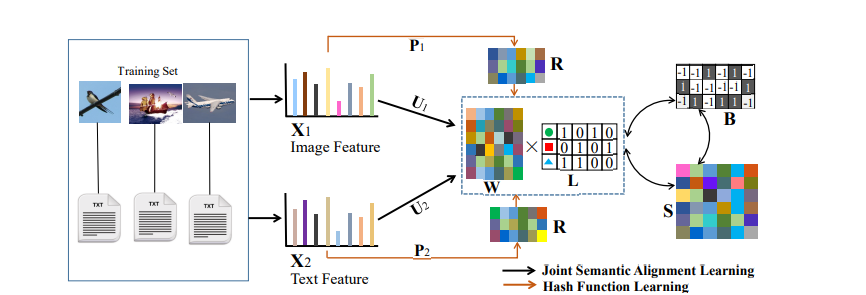
fig1：djsah框架
其中包括了联合语义对齐学习（学习过程为黑色箭头）以及哈希函数学习（橙色箭头）具体地，djsah通过合并原始的数据分布x1x2、标签L之间的语义对齐以及成对相似矩阵S来生成特定的哈希码B

### 1.3 本文主要贡献
1. 提出了全新的有监督跨模态图文哈希散列方法DJSAH，该方法**集成了低层级的数据特性以及高层及的多语义一致性（基于类标签以及成对相似性）来生成高效哈希码**。具体的讲，这种方法不仅通过充分利用语义关系升级了哈希码的判别能力，而且通过构造成对相似性规避了大量算力和存储的浪费
2. 构造了一个构造函数以及离散的优化函数，能够有效地获取到离散哈希码并且**不需要松弛**，更进一步的优化函数的细节理论分析在后文  
3. 大量实验分析表明DJSAH可以更好的运行  
**后续的编排：**
第二章讲述相关研究，第三部分介绍方法的细节（理论基础），第四部分展示相关的实验分析（即我需复现的部分），最后部分为总结


## 相关研究工作
**当前基于哈希方法的跨模态图文检索方法主要有两种。**
### 2.1 无监督哈希方法
无监督哈希方法通过发现**内部数据分布为基础的训练集之间的语义相关性**实现检索任务。相关的研究有Kumar*通过最小化跨模态检索的加权距离来获得相同样本的相似性*、Zhu采用了*锚图*（关于anchor：https://blog.csdn.net/weixin_44285715/article/details/105124650 ）来保持相同实例的关系而不是使用相似矩阵、Zhou通过*整合稀疏编码和矩阵分解产生独特的哈希码，将数据投影到二进制空间中*、Ding利用*基于跨模态散列的矩阵分解工具*来进行哈希码的学习、Wang采用了*集体矩阵分解散列*。总之，这些方法主要都使用了常见的数据特性来训练散列模型。和上述不同的，今年有一些信的方法结合了数据共性和独特的属性来提高检索准确率。Wang通过利用数据实例之间相似的特征表现，同时考虑到特有的特征表现，获取到了高质量的哈希码。其他相关的方法没被详述。 


其中方法**仅利用原始实例的内部数据分布和特征来获得哈希码**。 然而，数据对的单个特征表示**不能完全探索不同模式之间的相关性**。 因此，有必要在散列学习中利用共享的监督信息（标签或成对数据约束）。

### 2.2 有监督的哈希方法
通过**利用共享的、有监督的、数据实例之间的信息**，有监督的哈希方法能够更进一步的提高哈希码的质量。  
一些的有监督的方法通过保存标签相似性和数据特性语义关系来学习哈希码；Lin通过将亲和矩阵转变成概率分布，然后用二进制码去逼近。但这些方法有着高空间消耗以及训练时的算力消耗（基于监督的类信息的相似矩阵的结构导致的）。   
解决这些问题，也提出了一些散列方法：通过**应用有监督信息以及有用的数据特性**来捕获有区分能力的独特散列码。这些工作能够增加准确性，降低时间复杂度。e.g：Zhang通过基于标签信息接近相似图获得哈希码；Jiang设计了一个离散因素模型，来直接对哈希函数进行学习。此外还有方法如直接通过语义标签和矩阵分解来指导哈希函数学习、结合形式变换后的语义标签和子空间关系来联合生成高分辨能力的散列码、嵌入双语义监督信息和优化策略，以提高搜索精度，同时保持良好的学习效率、通过合并多数据分布来最大化散列因素等等。  
近年来还有许多深度学习的应用，但在散列学习中，本文重点介绍了**针对跨模态图文搜索方向的浅层监督方法而不是深度方法**

## 提出的方法
### 3.1 符号与问题定义
假设跨模态训练集包含了n个图文对：
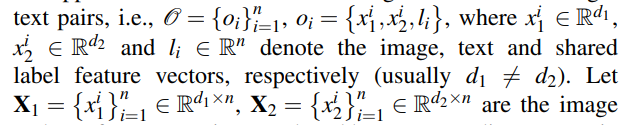

$x_1^i$和$x_2^i, l_i$在d1，d2和n维空间中，训练集包含了n组这样的$x_1^i,x_2^i,l_i$，分别对应图片信息，文本信息以及两种信息间公有的标签特征向量，又有$X_1,X_2$为图片/文本特征矩阵。$X_1,X_2可看做O_i对应向量生成的$
监督的方法通过**Label矩阵**$L\in \mathbb{R} ^{c*n}$  
为了方便搜索，方法中增加了相似矩阵S，方便表示，$o_i和o_j的相似性可表示为$  
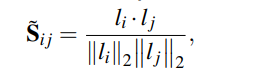

其中分母为l2范数，$l_i,l_j 为标签向量，用\tilde{L}\in\mathbb{R}^{c\times n}矩阵存储标签信息$  
$$\tilde{L}=\frac{l_{ki}}{||l_i||_2}$$

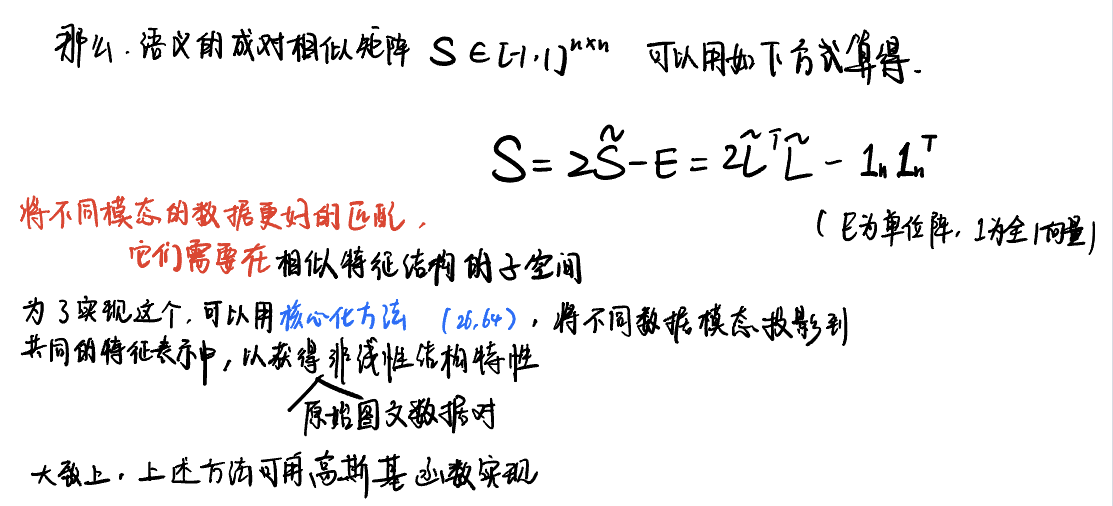

**核函数**
关于核函数的概念：https://www.zhihu.com/question/24627666
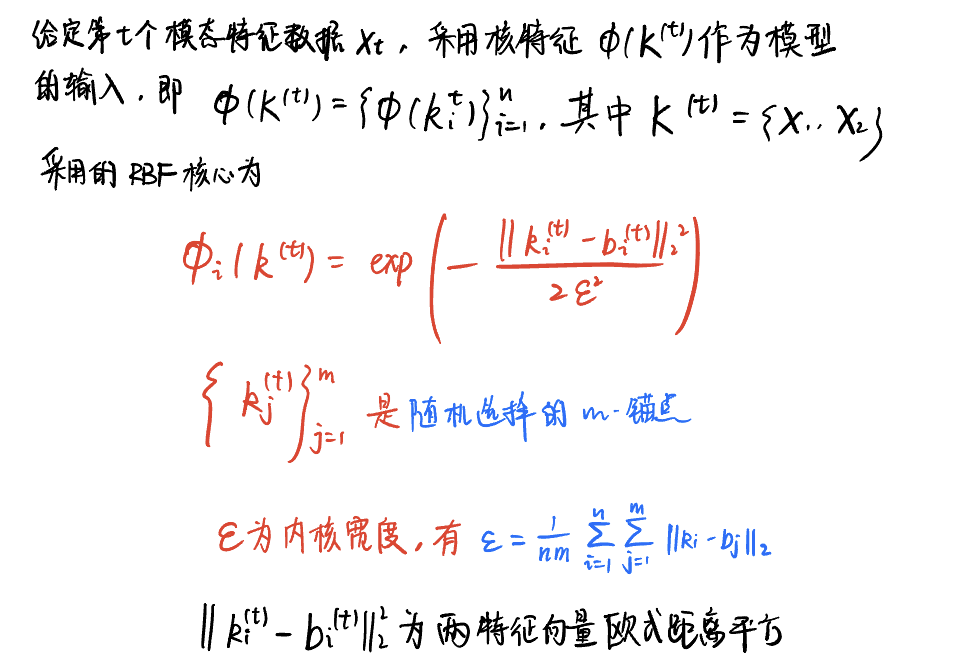

**本文中后续使用到的变量与符号**
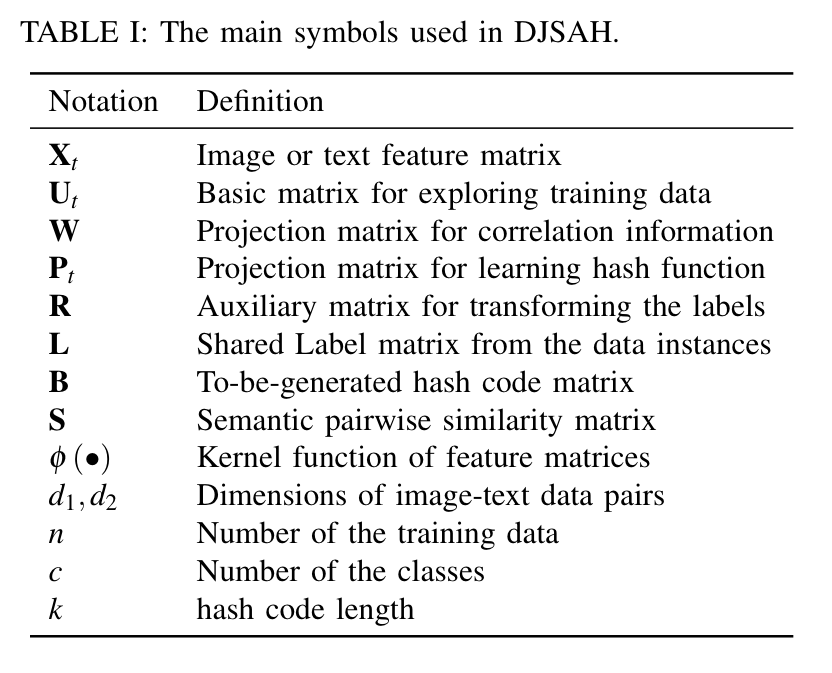
### 3.2 模型方程
DJSAH方法主要包含两个主要部分，首先是**联合语义对齐散列**，其次是**哈希函数学习**。具体地讲，为了克服有限关系的问题，本文通过有**监督的类标签以及相似矩阵的语义的一致性**构建了一个联合语义对齐学习模块来制定哈希码

#### 3.2.1 联合语义对齐学习
拥有相似主题的相似的数据实例应该表现出相似的散列编码。对于一些典型的散列方法，它们通过利用**常用的内积将包含可用语义关系的成对相似性保留到生成的哈希码**中，从而获得令人满意的性能。因此，**目标函数**被表述为：
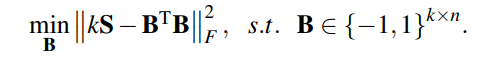
直接优化上述的方程是很困难的，因为$\pmb{B}$存在着整数的约束。一种常用的方法是松弛对$\pmb{B}$的约束：$$\pmb{B}\in\{-1,1\}^{k\times n}\Rightarrow\pmb{B}\in[-1,1]^{k\times n}$$
但该策略会丢失散列码矩阵可用的信息，不可避免地降低检索准确率，此外，空间时间复杂度均为O(n^2)，此外，它们忽视了共享的类标签信息，可能会导致信息的丢失。  
受到上述研究的启发，该方法将其中的一个散列码矩阵$\pmb{B}$替换为**转换后的实值语义标签，并且增加了低级数据的分布信息。**   
该方法有两个优势：1. 增加了散列码的分辨能力；2. 获得了**线性计算的计算和存储成本**（具体分析在复杂性分析中）  
在考虑数据特征的同时，通过整合包括类标签和成对相似性在内的多种语义信息，直接生成统一的哈希码$\pmb{B}$。 

联合语义对齐学习的目标函数是：
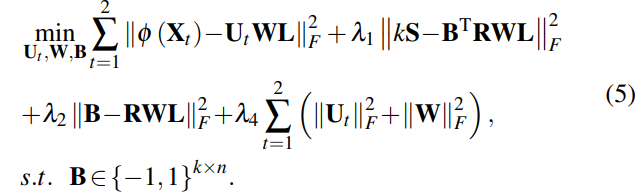
其中数学符号：$\phi $:kernal function, $X_t$: 图/文特征矩阵, $U_t$:基本矩阵, $W$:相关信息投影， $k$:散列码长度，$L$：共享的标签矩阵，$R$：辅助矩阵，$B$：目标散列矩阵，$S$：语义成对相似矩阵  
逐项分析目标函数：  
第一项代表的是**集体矩阵分解**（https://blog.csdn.net/qq_42014059/article/details/123312452 ）  
集体矩阵分解**将不同数据模式映射到特征表示中**。接下来的两项是**联合语义对齐项，它依赖于多个监督信息及其对应的语义一致性**来生成哈希码矩阵 B。最后一项是**正则化**，避免出现散列模型过拟合

第三项($||\pmb{B}-\pmb{RWL}||_F^2$)中，矩阵变量WL表示原始数据的一般特征表示。许多有监管的方法通常通过采用如下变换方式来学习二进制散列码：
$$||\pmb{B-WL}||^2_F,s.t.\space B\in\{-1,1\}^{k\times n} \space(公式6)$$
获得散列码的闭式解，即$$\pmb B=sgn(\pmb{WL})\space(公式7)$$
直接用公式7就可以学习散列码，但这同样带来了量化损失，因而导致性能下降。  
作者使用**ITQ方法**（迭代量化方法，图像检索方法）来最小化将生成的散列码的量化损失。引入**正交变化矩阵**$\pmb R$，则有
$$||\pmb{B-RWL}||^2_F,s.t.\pmb R^T\pmb R = \pmb I \space(公式8)$$
$\pmb I$为单位阵，故可以得到散列码的解有$$\pmb B=sgn(\pmb{RWL})\space(公式9)$$


一些成功的基于ITQ学习的成果已经展示了ITQ策略和模型结合的优势。因此，采用公式8的公式来产生统一的哈希码。 在下文中，将证明矩阵变量$\pmb{RWL}$不仅有助于最小化哈希码的量化损失，而且是方程5的局部最优解。此外，通过最小化量化损失得到的正交矩阵**R**，可以让散列码的量化损失减小

#### 3.2.2 哈希函数学习
在哈希函数学习部分中，DJSAH通过**将图文数据映射到一个公共的汉明空间**(Hamming space)来学习一系列的哈希函数。构建映射的方式如下方程：
$$f(\phi (x_t))=sgn(\pmb P_t\phi(x_t))\space(公式10)$$
其中$\pmb P_t$表示图文模态之间的映射矩阵，在上述已经存在的方法中，不同模态的哈希函数是通过从特征表示到散列码的，广泛使用的线性回归来学习的。这些函数是线性且简单的，有下列的格式：
$$\min_{\pmb P_t}\lambda_3||\pmb B-\pmb P_t\phi(X_t)||_F^2+\lambda_4||\pmb P_t||_F^2 \space(公式11)$$
为了避免优化映射矩阵$\pmb P_t$的过程中带来的信息损失，作者将离散的**B**替换为了**实值语义标签矩阵RWL**。同时，使用公式10经常会带通常会产生**量化误差和搜索性能下降。**  
因此，公式11可以被改写成如下的形式
$$\min_{\pmb W,\pmb P_t}\lambda_3\sum_{t=1}^2||\pmb{RWL}-\pmb P_t\phi(X_t)||_F^2+\lambda_4\sum_{t=1}^2(||\pmb W_t||_F^2+||\pmb P_t||_F^2)\space(公式12)$$
得到矩阵$\pmb{W,R}$后，在联合语义对齐学习中，哈希函数可以通过公式12来学习获取映射矩阵$\pmb P_t$，然后用于**查询过程**

#### 3.2.3 总体目标函数
DJSAH的中心思想是通过发现多重语义的关系以及不同模态对应的一致性（**corresponding consistency**）为了解决这个问题，它需要通过联合语义对齐学习项学习统一的哈希码，并通过哈希函数学习项学习特定于模态的哈希函数，并将其应用于跨模态图文搜索。  
因此，将公式5和12整合到一个统一的框架中来制定 DJSAH 的整体目标函数：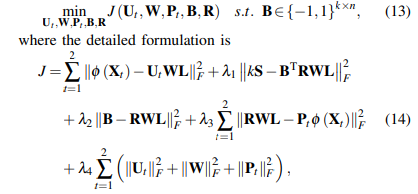

（注意到**公式13,14本质上是在公式5中增加了公式12中的$\lambda_3$项，然后$\lambda_4$项整合了两个式子，为三个F范数平方求和**）
$U_t\in\mathbb R^{d_t\times k}$是数据实例的基本矩阵、$W\in \mathbb R^{k\times d_t}$是辅助矩阵
$\pmb P_t$表示图文模态之间的映射矩阵、四个**λ**为**权衡参数**。前三个分式（无param至$\lambda_2$项）定义了联合语义学习的过程，第四个分式代表的是哈希函数学习部分，最后一部分是避免过拟合的正则化部分。

### 3.3 优化算法
总体上说如何优化计算公式13的式子是一个离散学习问题（discrete learning problem），这是不能被直接解决的。大多数开创性方法使用连续松弛策略，该策略将松弛解决方案限制为统一哈希码。但训练这些哈希模型的过程中，这种策略不可避免带来了有用信息的丢失，以及伴随而来的劣质哈希码。  
解决这个问题，作者采用了一种**离散优化算法**来求得公式13中待解的矩阵值，该优化问题可以被如下过程描述的方法迭代的解决
#### 3.3.1 更新$\pmb U_t$的方法
通过**固定$\pmb P_t,\pmb W,\pmb R$和$\pmb B$**，公式13可以被改写为：
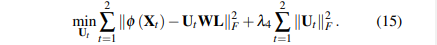
（仅保留带$\pmb U_t$项，其余项为定值，最小值不讨论）

当公式15关于$\pmb U_t$的**导数为0时**，可以得到有
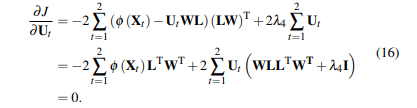
矩阵乘法的求导过程：https://blog.csdn.net/zhh_hhz/article/details/109118538  
F范数求导： https://blog.csdn.net/lgl123ok/article/details/121823906

可以得到$\pmb U_t$的解析解为
$$\pmb U_t = \sum_{t=1}^2\phi(X_t)L^TW^T(WLL^TW^T+\lambda_4I)^{-1}$$